# Elliptic Curve Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ECAdd`
Add two elliptic curve points.

This takes elliptic curve points given by (a, b) and (x, y)
and outputs the sum (x_r, y_r) in the second pair of registers.

Because the decomposition of this Bloq is complex, we split it into six separate parts
corresponding to the parts described in figure 10 of the Litinski paper cited below. We follow
the signature from figure 5 and break down the further decompositions based on the steps in
figure 10.

#### Parameters
 - `n`: The bitsize of the two registers storing the elliptic curve point
 - `mod`: The modulus of the field in which we do the addition.
 - `window_size`: The number of bits in the ModMult window. 

#### Registers
 - `a`: The x component of the first input elliptic curve point of bitsize `n` in montgomery form.
 - `b`: The y component of the first input elliptic curve point of bitsize `n` in montgomery form.
 - `x`: The x component of the second input elliptic curve point of bitsize `n` in montgomery form, which will contain the x component of the resultant curve point.
 - `y`: The y component of the second input elliptic curve point of bitsize `n` in montgomery form, which will contain the y component of the resultant curve point.
 - `lam_r`: The precomputed lambda slope used in the addition operation if (a, b) = (x, y) in montgomery form. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Litinski. 2023. Fig 5.


In [2]:
from qualtran.bloqs.cryptography.ecc import ECAdd

### Example Instances

In [3]:
n, p = sympy.symbols('n p')
ec_add = ECAdd(n, mod=p)

In [4]:
ec_add_small = ECAdd(5, mod=7)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([ec_add, ec_add_small],
           ['`ec_add`', '`ec_add_small`'])

### Call Graph

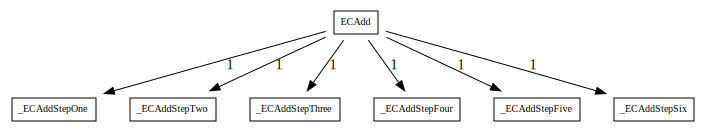

#### Counts totals:
 - `_ECAddStepFive`: 1
 - `_ECAddStepFour`: 1
 - `_ECAddStepOne`: 1
 - `_ECAddStepSix`: 1
 - `_ECAddStepThree`: 1
 - `_ECAddStepTwo`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
ec_add_g, ec_add_sigma = ec_add.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ec_add_g)
show_counts_sigma(ec_add_sigma)